<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_S%C3%A9ries_N%C3%A3o_Lineares_e_N%C3%A3o_Estacion%C3%A1rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Não-Lineares e Não-Estacionárias

**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip3 install -U git+https://github.com/PYFTS/pyFTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-4dpo_2tn
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-4dpo_2tn
  Created wheel for pyFTS: filename=pyFTS-1.6-py3-none-any.whl size=217118 sha256=f29402903daf1fa07ea4a37f2c25a3f33c3b4ea6a1630cf7ee58ea76861fa769
  Stored in directory: /tmp/pip-ephem-wheel-cache-a4ks6obd/wheels/30/23/2b/2e10c811e284f08e37b5f6d6320e78bade4dd580081288f61a
Successfully built pyFTS


## Séries Temporais Não-Lineares

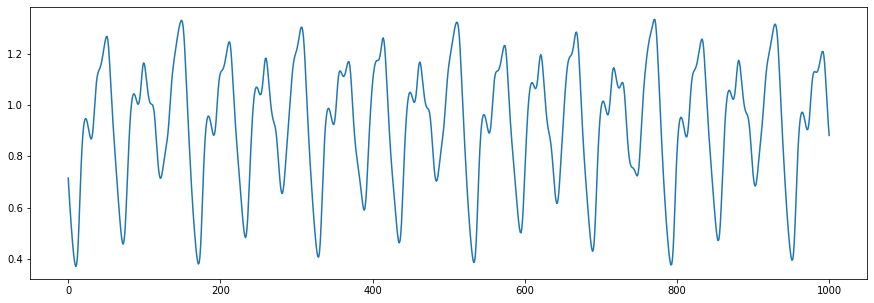

In [ ]:
from pyFTS.data import mackey_glass

st1 = np.array(mackey_glass.get_data())

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(st1)

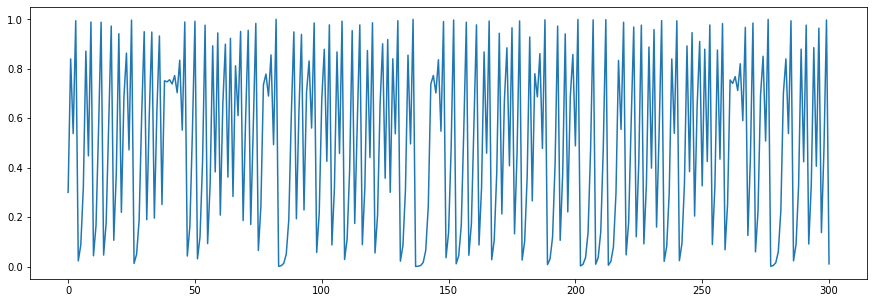

In [ ]:
from pyFTS.data import logistic_map

st4 = np.array(logistic_map.get_data(iterations=300))

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(st4)

### Modelo NVAR

In [ ]:
# Redes MLP de 2 camadas

def lags(dados, p):
  T, n = dados.shape
  X = np.zeros((T-p, n*p))
  Y = dados[p:, :]
  for i in range(p, T):
    for j in range(p):
      X[i - p, j*n:(j*n)+n] = dados[i-(p-j), : ]
  return X, Y


def linear(x, derivada = False):
  if not derivada:
    return x
  else:
    return 1


def sigmoide(x, derivada = False):
  if not derivada:
    return 1./(1. + np.exp(-x))
  else:
    y = sigmoide(x)
    return y*(1-y)

def relu(x, derivada = False):
  if not derivada:
    return np.maximum(x, 0)
  else:
    return np.where(np.maximum(x, 0) > 0, 1, 0) 

def mse(y, yl, derivada = False):
  if not derivada:
    return ((y-yl)**2)/2
  else:
    return y-yl

def ajustar_nvar(dados, p, **kwargs):
  X,Y = lags(dados, p)
  taxa_aprendizado = kwargs.get("taxa_aprendizado", 0.02)
  numero_epocas = kwargs.get("numero_epocas", 100)
  batch = kwargs.get("batch", 100)
  funcao_custo = kwargs.get("funcao_custo", mse)
  inicializacao_media = kwargs.get("inicializacao_media", 0)
  inicializacao_desvio = kwargs.get("inicializacao_desvio", 0.5)
  ativacao_camada1 = kwargs.get("ativacao_camada1", sigmoide)
  ativacao_camada2 = kwargs.get("ativacao_camada2", sigmoide)
  num_in = X.shape[1]
  num_neuron = kwargs.get("num_neuron", num_in)
  num_out = Y.shape[1]
  num_inst = X.shape[0] 

  W1 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_neuron, num_in))
  B1 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_neuron,1))

  W2 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_out, num_neuron))
  B2 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_out, 1))

  log_erros = []

  for epocas in np.arange(numero_epocas):

    for z in np.arange(batch):
      i = np.random.randint(0,num_inst)

      #################################
      # Forward
      #################################

      # Camada 1
      h1 = np.zeros(num_neuron)
      saidas1 = np.zeros(num_neuron)

      for neuronio in range(num_neuron):
        h = W1[neuronio].dot(X[i,:]) + B1[neuronio]
        saidas1[neuronio] = ativacao_camada1(h)
        h1[neuronio] = h

      # Camada 2
      h2 = np.zeros(num_out)
      saidas2 = np.zeros(num_out)

      for neuronio in range(num_out):
        h = W2[neuronio].dot(saidas1) + B2[neuronio]
        saidas2[neuronio] = ativacao_camada2(h)
        h2[neuronio] = h

      #################################
      # Backward
      #################################

      # Camada de Saída

      erros = np.zeros(num_out)

      delta2 = np.zeros(num_out)

      for neuronio in range(num_out):
        erros[neuronio] = funcao_custo(Y[i,neuronio], saidas2[neuronio])
        
        delta2[neuronio] = funcao_custo(Y[i,neuronio], saidas2[neuronio], derivada=True) * ativacao_camada2(h2[neuronio], derivada=True)
        
        W2[neuronio] += taxa_aprendizado * -delta2[neuronio] * -saidas1
        B2[neuronio] += taxa_aprendizado * -delta2[neuronio]

      # Camada de Entrada
      
      for neuronio in range(num_neuron):

        delta1 = ativacao_camada1(h1[neuronio], derivada=True) * np.sum([delta2[j] * W2[j][neuronio] for j in range(num_out)])
        
        W1[neuronio] += taxa_aprendizado * -delta1 * -X[i,:]
        B1[neuronio] += taxa_aprendizado * -delta1

      log_erros.append(np.mean(erros))

  plt.plot(log_erros)

  in_sample = nvar(dados, p, [W1, B1, W2, B2, None], **kwargs)

  sigma = np.std(Y - in_sample)  

  return W1, B1, W2, B2, sigma

def nvar(dados, p, parametros, **kwargs):
  x,_ = lags(dados, p)
  W1, B1, W2, B2, _ = parametros
  ativacao_camada1 = kwargs.get("ativacao_camada1", linear)
  ativacao_camada2 = kwargs.get("ativacao_camada2", linear)
  num_in = len(W1)
  num_out = len(W2)
  num_inst = x.shape[0]
  num_neuron = kwargs.get("num_neuron", num_in)
  ret = np.zeros((num_inst, num_out))
  for i in range(num_inst):
    
    saidas1 = np.zeros(num_neuron)
    for neuronio in range(num_in):
      saidas1[neuronio] = ativacao_camada1(W1[neuronio].dot(x[i,:]) + B1[neuronio])

    saidas2 = np.zeros(num_out)
    for neuronio in range(num_out):
      saidas2[neuronio] = ativacao_camada2(W2[neuronio].dot(saidas1) + B2[neuronio])

    ret[i, :] = saidas2
  return ret


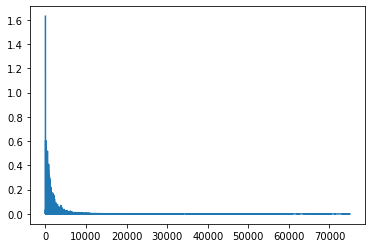

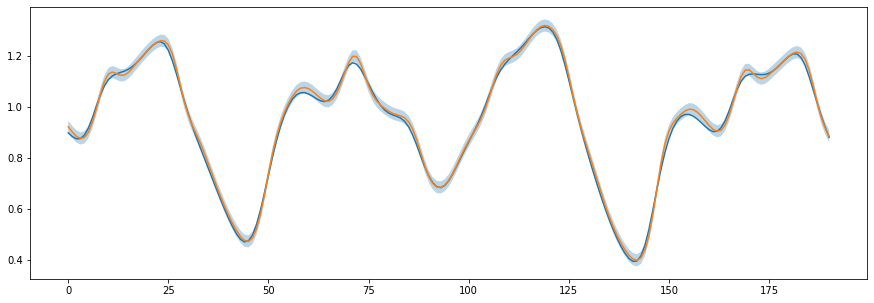

In [ ]:
p = 10
treino = np.array(st1[:800]).reshape((800,1))
teste = np.array(st1[800:]).reshape((201,1))

parametros = ajustar_nvar(treino, p, taxa_aprendizado = 0.01,  
                                  numero_epocas = 1500,
                                  num_neuron=20,
                                  ativacao_camada1=linear,
                                  ativacao_camada2=linear,
                                  batch=50)

sigma = parametros[-1]

previsoes = nvar(teste, p, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

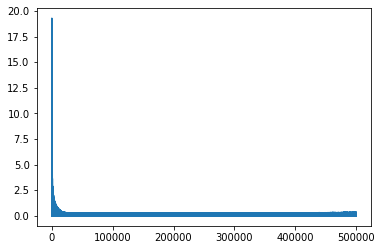

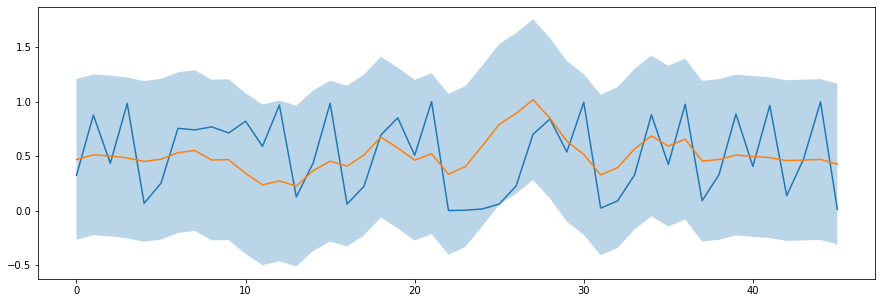

In [ ]:
p = 5
treino = np.array(st4[:250]).reshape((250,1))
teste = np.array(st4[250:]).reshape((51,1))

parametros = ajustar_nvar(treino, p, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 10000,
                                  num_neuron=30,
                                  ativacao_camada1=linear,
                                  ativacao_camada2=linear,
                                  batch=50)

sigma = parametros[-1]

previsoes = nvar(teste, p, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

## Séries Temporais Não-Estacionárias e Concept Drift

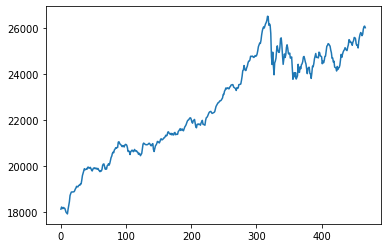

In [ ]:
st2 = pd.read_csv('https://query.data.world/s/mcwvp7zb7monq3kisbbwauo6tffapt', sep=',')
st2 = st2['AVG'].values[8000:]

plt.plot(st2)

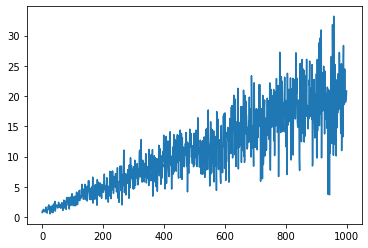

In [ ]:
#df = pd.read_csv('https://query.data.world/s/grcki4u3nemsczutfs6zitaadymaic')
#df = pd.read_csv('https://query.data.world/s/oi2slfumecjm2vfhcqdfk5l5wm22b5')
df = pd.read_csv('https://query.data.world/s/l6g3yao3kh52st2liksgd5vffmqdog')
st3 = df['0'].values
plt.plot(st3)

### TV-AR(1)

In [ ]:
def tv_ar1(dados, beta):
  n = len(dados)
  alfas = np.ones(n+1)
  alfa = 1.
  ret = np.zeros(n)
  ret[0] = dados[0]
  for i in range(2, n):
    ret[i] = dados[i-1] * alfa
    alfas[i] = dados[i-1]/dados[i-2] if dados[i-2] > 0 else 0 
    alfa = beta * alfas[i] + (1 - beta) * alfa
  
  return ret[2:]


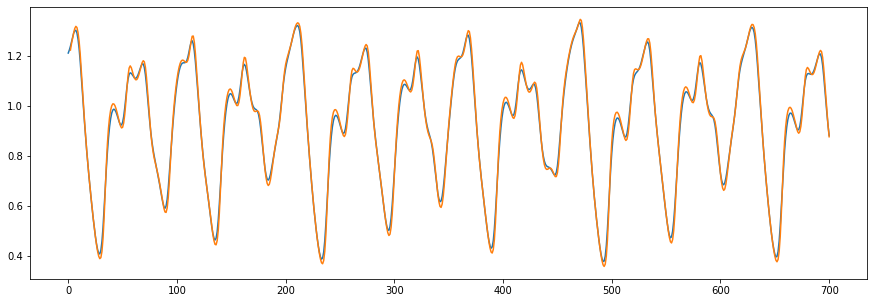

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(st1[300:])
ax.plot(range(2,len(st1[300:])), tv_ar1(st1[300:], 0.9))

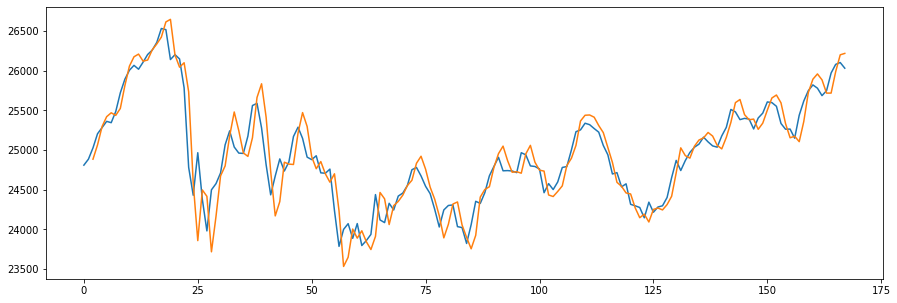

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(st2[300:])
ax.plot(range(2,len(st2[300:])), tv_ar1(st2[300:], 0.5))

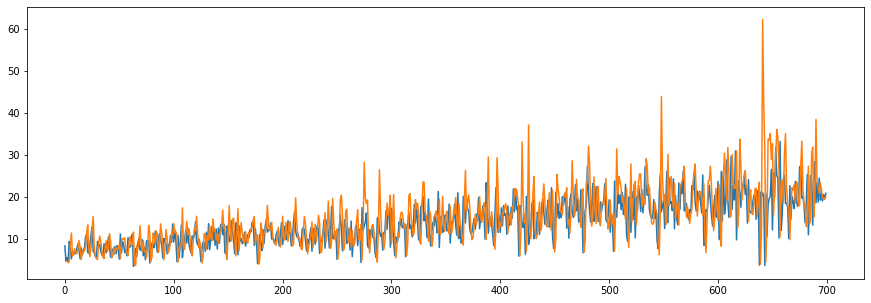

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(st3[300:])
ax.plot(range(2,len(st3[300:])), tv_ar1(st3[300:], 0.5))

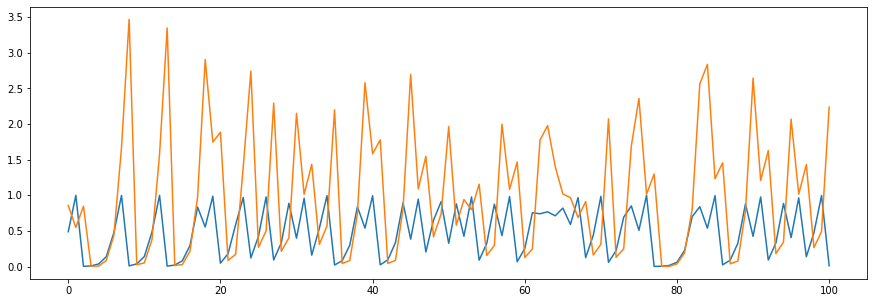

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st4[200:])
plt.plot(tv_ar1(st4[200-2:],0.5))

### TV-ARMA(p,q)

In [ ]:
def tv_arma11(dados, gamma, delta):

  previsoes_ar = tv_ar1(dados, gamma)

  residuos_ar = dados[2:] - previsoes_ar

  previsoes_ma = tv_ar1(residuos_ar, delta)

  return previsoes_ar[2:] + previsoes_ma

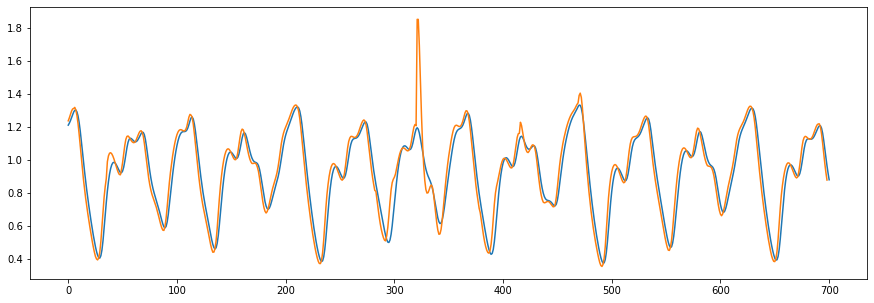

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st1[300:])
plt.plot(tv_arma11(st1[300-2:],0.5, 0.1))

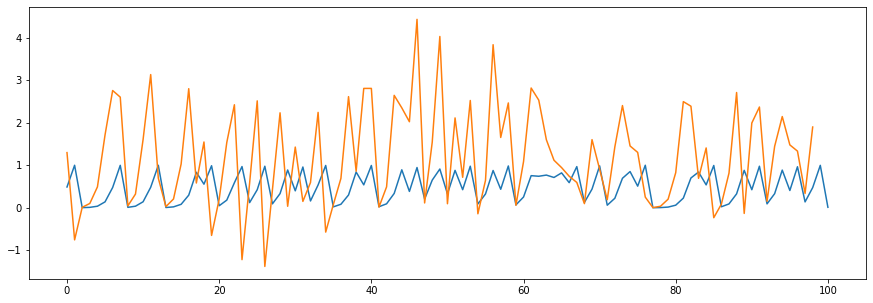

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st4[200:])
plt.plot(tv_arma11(st4[200-2:],0.5, 0.1))

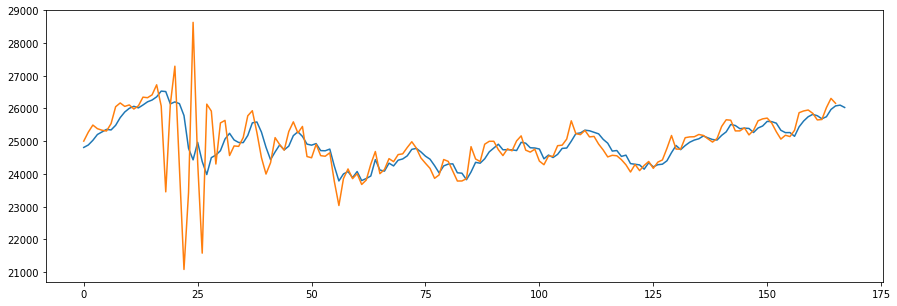

In [ ]:
n = len(st2[300:])
p = 1
q = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st2[300:])
plt.plot(tv_arma11(st2[300-2:],0.9, 0.1))

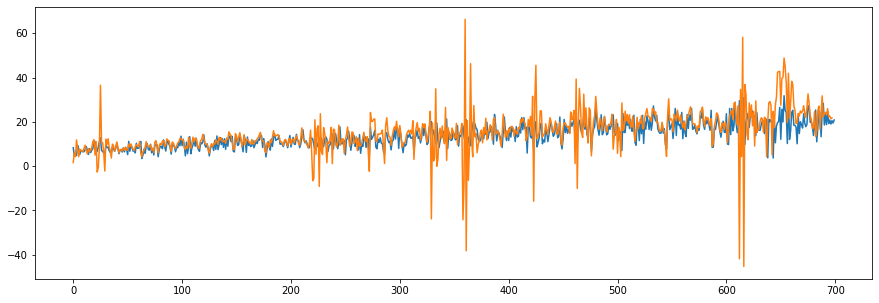

In [ ]:
n = len(st3[300:])
p = 1
q = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st3[300:])
plt.plot(tv_arma11(st3[300-2:],0.1, 0.1))

### TV-AR(p) com Filtro de Kalman

In [ ]:
def kalman_predicao(a, V, F, G, tau):
  a_t = F @ a
  V_t = F @ V @ F.T + (tau * G @ G.T)

  return a_t, V_t

def kalman_filtragem(a, V, y, H, sigma):
  p = len(a)
  K =  V @ H.T * (H @ V @ H.T + sigma)**-1
  res_y = y - (H @ a)
  a_t = a + K * res_y
  V_t = (np.eye(p) - K @ H) @ V

  return a_t, V_t

def suavizacao(a, a_t, V, V_t, alpha ):
  a_f = alpha * a + (1 - alpha) * a_t
  V_f = alpha * V + (1 - alpha) * V_t
  return a_f, V_f

def tv_ar_kalman(dados, p, alfa=.9):
  n = len(dados)
  
  ## INICIALIZAÇÃO

  # Vetor de Estado / Coeficientes
  a = np.random.rand(p)
  a_t = a

  # Matrizes de Covariância
  V = np.eye(p)
  V_t = V
  F = np.eye(p)
  G = np.eye(p)

  # Resíduos e Variâncias
  res_y = np.ones(n) 
  sigma = 1.
  res_a = np.ones(n) 
  tau = 1.


  ret = np.zeros(n)
  ret[:p] = dados[:p]
  H = dados[0:p] 
  
  for i in range(p, n):

    # PREDIÇÃO DE ŷ(t+1)

    H_t = H
    H = dados[i-p:i]  # Vetor de defasagens / lags
    y = a @ H
    ret[i] = y

    #ATUALIZAÇÃO DOS COEFICIENTES USANDO O FILTRO DE KALMAN

    a_t = a
    V_t = V
    a, V = kalman_predicao(a_t, V_t, F, G, tau)
    a, V = kalman_filtragem(a, V, dados[i-1], H_t, sigma)
    a, V = suavizacao(a, a_t, V, V_t, alfa)
    
    # Resíduos de Y
    res_y[i] = dados[i] - y
    sigma = np.std(res_y)

    #Resíduos de a
    res_a[i] = np.mean(a_t - a)
    tau = np.std(res_a)

  return ret[p:]


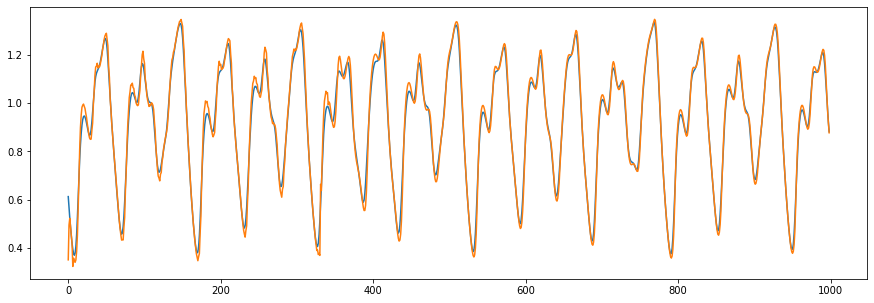

In [ ]:
n = len(st1[300:])
p = 2
q = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st1[p:])
previsoes = tv_ar_kalman(st1, p, .9)
plt.plot(previsoes)

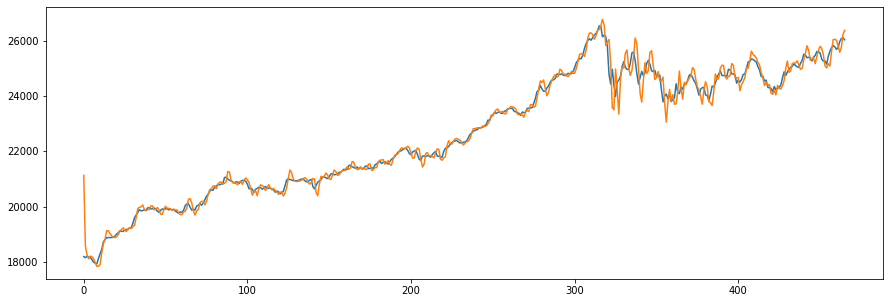

In [ ]:
p=2

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st2[p:])
previsoes = tv_ar_kalman(st2, p, .9)
plt.plot(previsoes)

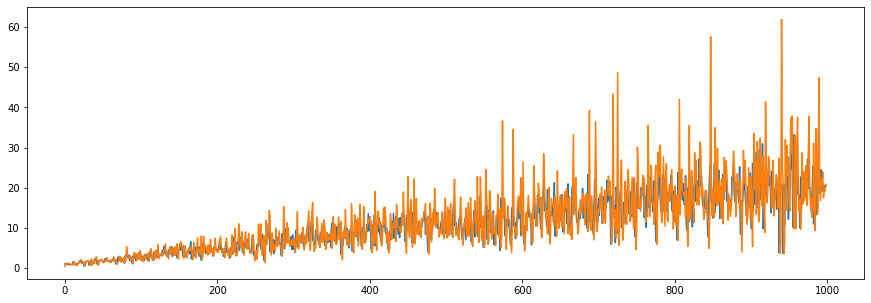

In [ ]:
p = 1

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st3[p:])
previsoes = tv_ar_kalman(st3, p, .9)
plt.plot(previsoes)

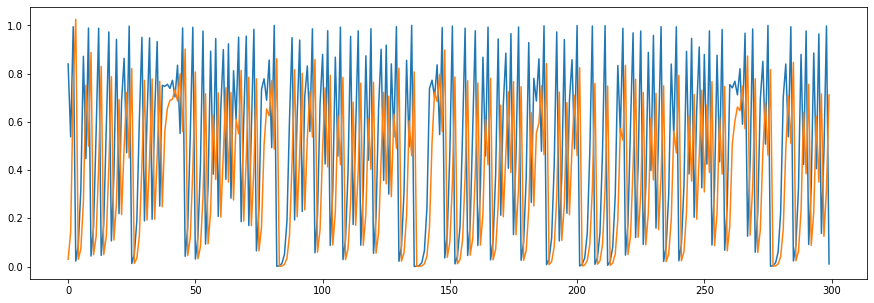

In [ ]:
p = 1

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st4[p:])
previsoes = tv_ar_kalman(st4, p, .5)
plt.plot(previsoes)

### TV-ARMA(p,q) com Filtro de Kalman

In [ ]:
def tv_arma_kalman(dados, p, q, alfa=.9, beta=.1):
  estimativas_ar = tv_ar_kalman(dados, p, alfa)
  residuos_ar = dados[p:] - estimativas_ar
  estimativas_ma = tv_ar_kalman(residuos_ar, q, beta)
  return estimativas_ar[q:] + estimativas_ma

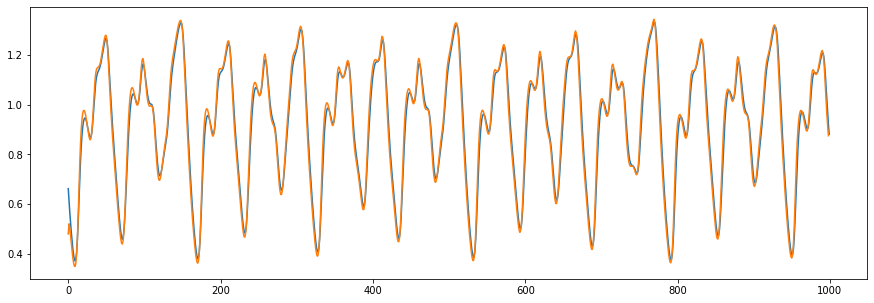

In [ ]:
p = 1
q = 1

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st1[p:])
previsoes = tv_arma_kalman(st1, p, q, .5, .1)
plt.plot(previsoes)

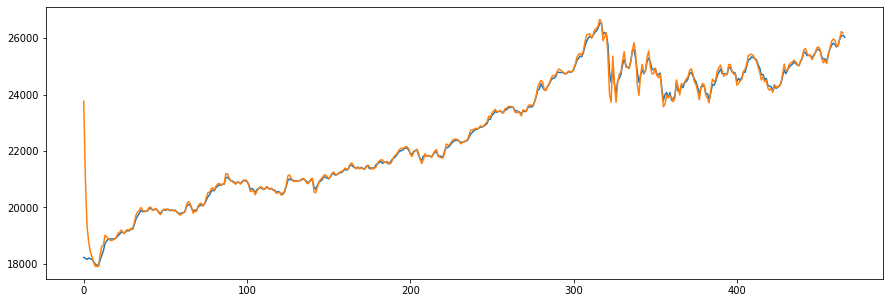

In [ ]:
p = 1
q = 1

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st2[p:])
previsoes = tv_arma_kalman(st2, p, q, .5, .1)
plt.plot(previsoes)

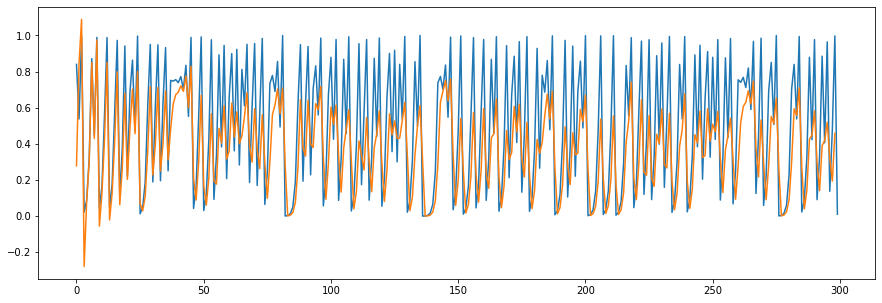

In [ ]:
p = 1
q = 1

fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot(st4[p:])
previsoes = tv_arma_kalman(st4, p, q, .5, .1)
plt.plot(previsoes)